In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import StratifiedKFold

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


In [3]:

stratified_kfold = StratifiedKFold(n_splits=5)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []  # To store confusion matrices



In [4]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    gradient_boosting = GradientBoostingClassifier()
    gradient_boosting.fit(X_train, y_train)


    y_pred = gradient_boosting.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)
    
# Calculate and print the mean and standard deviation of metrics
print("Mean Accuracy =", np.mean(accuracy_scores))
print("Mean Precision =", np.mean(precision_scores))
print("Mean Recall =", np.mean(recall_scores))
print("Mean F1-score =", np.mean(f1_scores))

print("Standard Deviation Accuracy =", np.std(accuracy_scores))
print("Standard Deviation Precision =", np.std(precision_scores))
print("Standard Deviation Recall =", np.std(recall_scores))
print("Standard Deviation F1-score =", np.std(f1_scores))

for i, confusion in enumerate(confusion_matrices):
    print(f'Confusion Matrix for Fold {i + 1}:')
    print(confusion)



Mean Accuracy = 0.8908644020988679
Mean Precision = 0.8523211247511909
Mean Recall = 0.8330047296369176
Mean F1-score = 0.8348267295118325
Standard Deviation Accuracy = 0.07503513473731109
Standard Deviation Precision = 0.1064643434741355
Standard Deviation Recall = 0.05140321183556695
Standard Deviation F1-score = 0.07519378713809549
Confusion Matrix for Fold 1:
[[309  22   0]
 [ 12  47   0]
 [  0   3  33]]
Confusion Matrix for Fold 2:
[[322   9   0]
 [  5  54   0]
 [  1   8  26]]
Confusion Matrix for Fold 3:
[[331   0   0]
 [ 14  45   0]
 [ 10   1  24]]
Confusion Matrix for Fold 4:
[[315  14   2]
 [ 16  40   3]
 [  3   0  32]]
Confusion Matrix for Fold 5:
[[254  68   9]
 [ 32  27   0]
 [  0   0  35]]


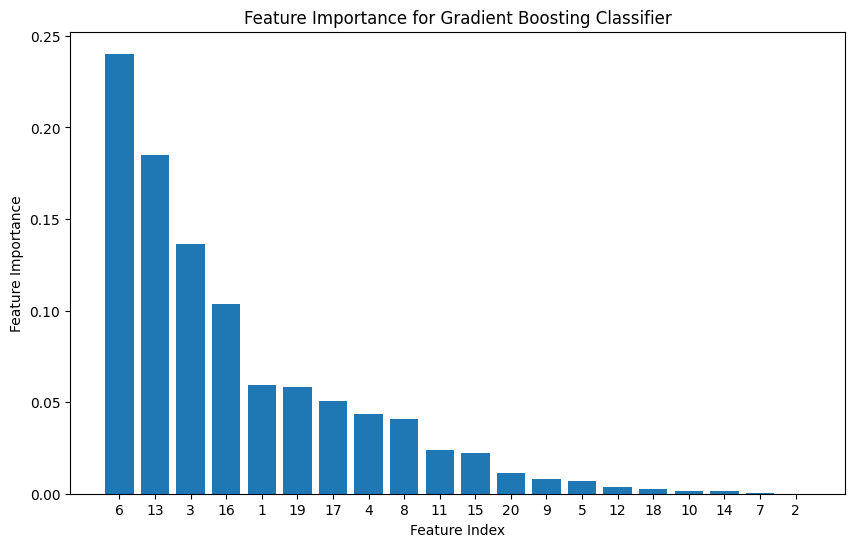

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generating some example data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
gb_classifier.fit(X_train, y_train)

# Getting feature importances
feature_importances = gb_classifier.feature_importances_

# Sorting features based on their importance
sorted_features_indices = feature_importances.argsort()[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_features_indices])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.xticks(range(X.shape[1]), sorted_features_indices + 1)  # Adding 1 to make indices start from 1
plt.show()


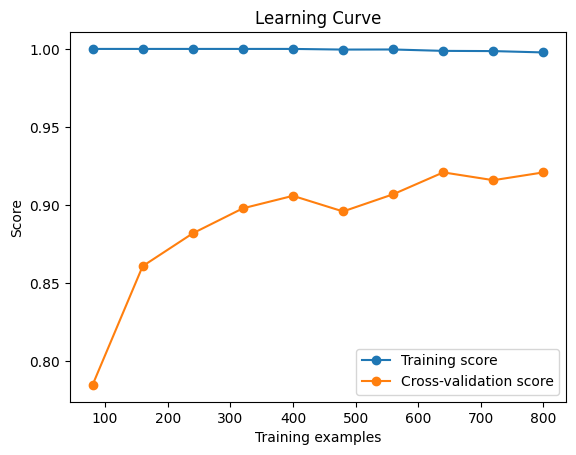

In [6]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gradient_boosting, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()